In [1]:
import pandas as pd
from clustering import CustomDBSCAN
from sklearn.metrics import silhouette_score

# Question - 5

In [2]:
data = pd.read_csv("dbscan.csv")
data

,cluster,pt,x,y,num_neighbors,neighbors
0,NaN,0,51.418089,13.593610,2,"0,27"
1,NaN,1,39.132318,-4.419204,3,"1,40,75"
2,NaN,2,47.807515,-25.822561,1,2
3,NaN,3,27.699703,53.434193,1,3
4,NaN,4,39.860995,5.676871,3,"4,56,75"
...,...,...,...,...,...,...
75,NaN,75,39.659047,0.230178,3,"1,4,75"
76,NaN,76,26.366491,8.798826,3,"21,49,76"
77,NaN,77,-36.184060,44.292045,2,"55,77"
78,NaN,78,44.012085,37.729478,3,"9,33,78"


In [3]:
dbscan = CustomDBSCAN(eps=7.5, min_pts=3)

In [4]:
X = data[["x", "y"]].to_numpy()
dbscan.fit(X)

CustomDBSCAN()

In [5]:
data["cluster"] = dbscan.clusters_

In [6]:
data["cluster"].value_counts()

 1    42
-1    29
 0     7
 2     2
Name: cluster, dtype: int64

# Question 6

In [14]:
from sklearn.datasets import make_moons
moons = make_moons(n_samples=200)

/Users/jay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

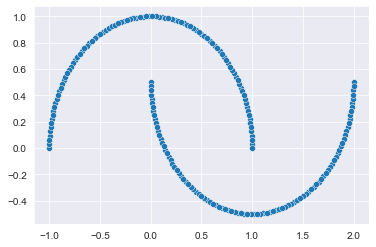

In [15]:
import seaborn as sns
sns.scatterplot(moons[0][:, 0], moons[0][:, 1])

In [16]:
dbscan = CustomDBSCAN(eps=0.1, min_pts=3)
dbscan.fit(moons[0])

CustomDBSCAN(eps=0.1)

/Users/jay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

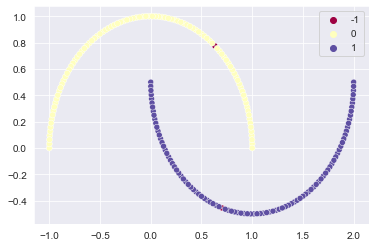

In [17]:
sns.scatterplot(moons[0][:, 0], moons[0][:, 1], hue=dbscan.clusters_, palette="Spectral")

In [18]:
from sklearn.datasets import make_circles
circles = make_circles(n_samples=200)

/Users/jay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

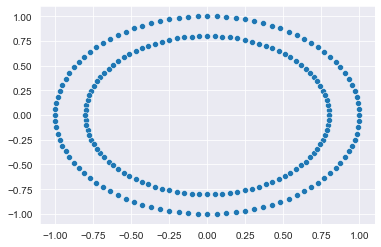

In [19]:
sns.scatterplot(circles[0][:, 0], circles[0][:, 1])

/Users/jay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

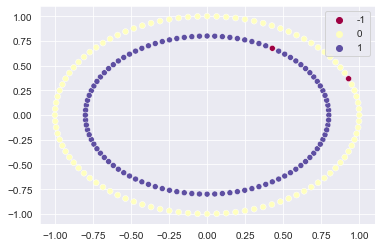

In [20]:
dbscan = CustomDBSCAN(eps=0.19, min_pts=3)
dbscan.fit(circles[0])
sns.scatterplot(circles[0][:, 0], circles[0][:, 1], hue=dbscan.clusters_, palette="Spectral")

In [21]:
from sklearn.datasets import make_blobs
blobs = make_blobs(n_samples=200)

/Users/jay/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

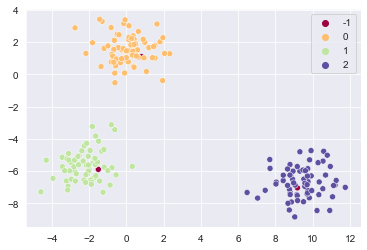

In [22]:
dbscan = CustomDBSCAN(eps=1.7, min_pts=5)
dbscan.fit(blobs[0])
sns.scatterplot(blobs[0][:, 0], blobs[0][:, 1], hue=dbscan.clusters_, palette="Spectral")

# Question 7

In [2]:
house_data = pd.read_csv("household_power_consumption.txt", delimiter=";")
house_data = house_data[house_data.columns[2:]]

/Users/jay/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
house_data.dropna(inplace=True)

In [4]:
house_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler_ = MinMaxScaler()
for col in house_data.columns:
    house_data[col] = scaler_.fit_transform(house_data[col].to_numpy().reshape(-1,1))
house_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387
1,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129
2,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387
3,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387
4,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387
...,...,...,...,...,...,...,...
2075254,0.078762,0.000000,0.556704,0.078838,0.0,0.0000,0.000000
2075255,0.078580,0.000000,0.542811,0.078838,0.0,0.0000,0.000000
2075256,0.078037,0.000000,0.536995,0.074689,0.0,0.0000,0.000000
2075257,0.077675,0.000000,0.533118,0.074689,0.0,0.0000,0.000000


In [6]:
X = house_data.to_numpy()
X = X[:20498]

In [26]:
dbscan = CustomDBSCAN(eps=2.5, min_pts=13, metric="euclidean")
dbscan.fit(X)

CustomDBSCAN(eps=2.5, min_pts=13)

In [25]:
print(f"Silhouette score for dbscan: {silhouette_score(X, dbscan.clusters_)}")

Silhouette score for dbscan: 0.738239810273864
